# Sentiment Analysis Model

**Project Overview**: In this project, we aim to conduct sentiment analysis on a dataset comprising news headlines. The objective is to classify these headlines into three categories: positive, negative, or neutral sentiment.
<br>
<br>
**Significance of Sentiment Analysis**: Sentiment analysis is a vital aspect of natural language processing that holds immense practical value. Understanding sentiment in text data can help organizations gauge public opinion, monitor brand perception, and make data-driven decisions.
<br>
<br>
**Dataset Description**: Our dataset consists of approximately 210,000 news headlines spanning from 2012 to 2022, sourced from HuffPost. It includes attributes such as category, headline, date, and more.
<br>
<br>
Colab Link: https://colab.research.google.com/drive/1ji9wBHSBNe14V3SRAcdleGM0BIh_ENlK?usp=sharing
<br><br>
Dataset Used: https://www.kaggle.com/datasets/rmisra/news-category-dataset/code

In [91]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_json("/content/drive/My Drive/News_Category_Dataset_v3.json", lines=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# Text cleaning and labeling
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    cleaned_text = " ".join(tokens)
    return cleaned_text
df["cleaned_headline"] = df["headline"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###Handling Class Imbalance:
In cases where class imbalance was observed, we adopted techniques to balance the distribution of sentiment classes, ensuring a fair representation of each sentiment.

In [93]:
from textblob import TextBlob

def label_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df["cleaned_headline"].apply(label_sentiment)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# Transforming text data into numerical features
X = tfidf_vectorizer.fit_transform(df["cleaned_headline"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment"], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
# Evaluation of  the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

    negative       0.81      0.46      0.58      4666
     neutral       0.83      0.95      0.89     26318
    positive       0.88      0.74      0.80     10922

    accuracy                           0.84     41906
   macro avg       0.84      0.71      0.76     41906
weighted avg       0.84      0.84      0.83     41906

Accuracy: 0.8399990454827471


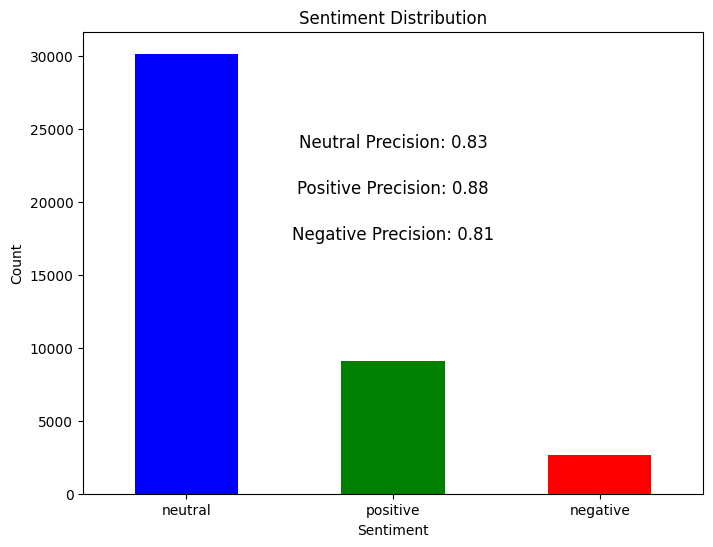

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

results_df = pd.DataFrame({'sentiment': y_pred})

# Generating a classification report to get precision for each class
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extracting precision values for each sentiment category
sentiment_precisions = {
    'positive': class_report['positive']['precision'],
    'negative': class_report['negative']['precision'],
    'neutral': class_report['neutral']['precision']
}
sentiment_counts = results_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for sentiment, precision in sentiment_precisions.items():
    ax.text(0.5, 0.75 - list(sentiment_counts.index).index(sentiment) * 0.1,
            f'{sentiment.capitalize()} Precision: {precision:.2f}', transform=ax.transAxes, fontsize=12, ha='center')
# Rotate the x-axis labels to be horizontal
ax.set_xticklabels(ax1.get_xticklabels(), rotation=0)
plt.show()

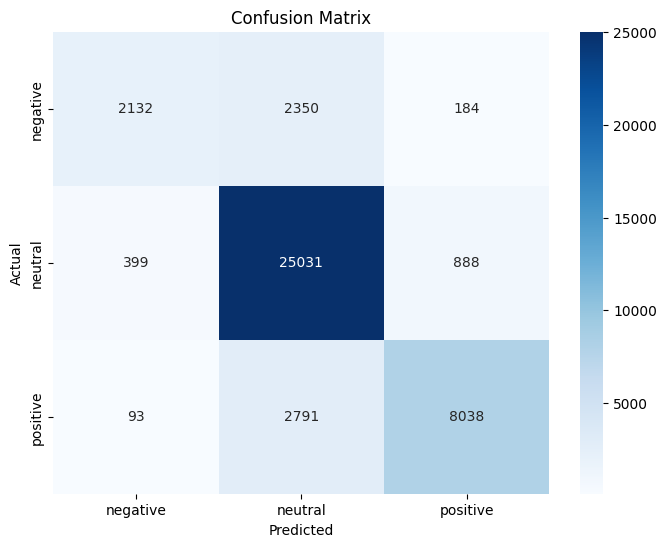

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

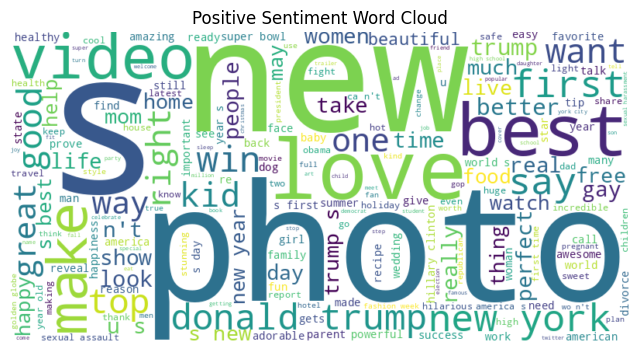

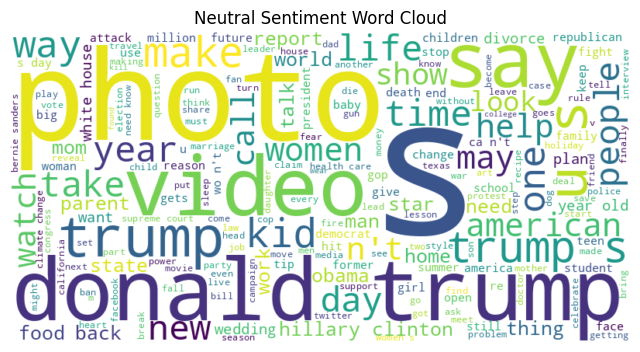

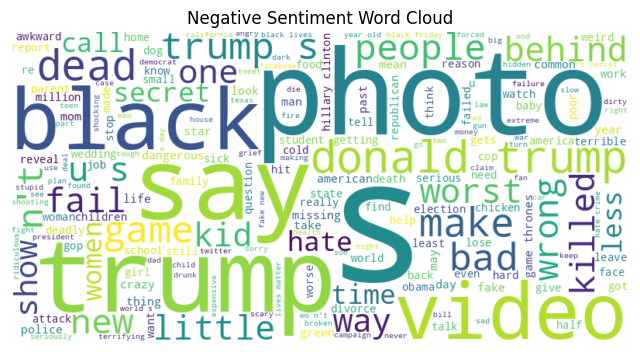

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentiments = ['positive', 'neutral', 'negative']
colors = ['green', 'blue', 'red']

for sentiment, color in zip(sentiments, colors):
    # Filter text based on sentiment
    sentiment_text = " ".join(df[df['sentiment'] == sentiment]['cleaned_headline'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()